In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler, PowerTransformer, QuantileTransformer, MinMaxScaler, MaxAbsScaler, RobustScaler, power_transform
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# os.chdir('drive/My Drive/Datasets/')
os.listdir()

['heart.csv',
 'iris.csv',
 'pima-indians-diabetes.csv',
 'sonar.csv',
 'housing.csv',
 'winequality-white.csv',
 'auto.csv']

In [ ]:
dataset = pd.read_csv('auto.csv')#, delimiter = ';'
# dataset['price'].astype(str).astype(float)
dataset['price']=dataset['price'].astype(str).astype(float)


0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: object

In [ ]:
dataset.info()
dataset.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16   engine-size       205 non

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
dataset.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [ ]:
# dataset.corr()

In [ ]:
# sb.set_style("whitegrid");
# sb.pairplot(dataset, hue="price", height=3);
# plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe3dcb5f3c8>,
      dtype=object)

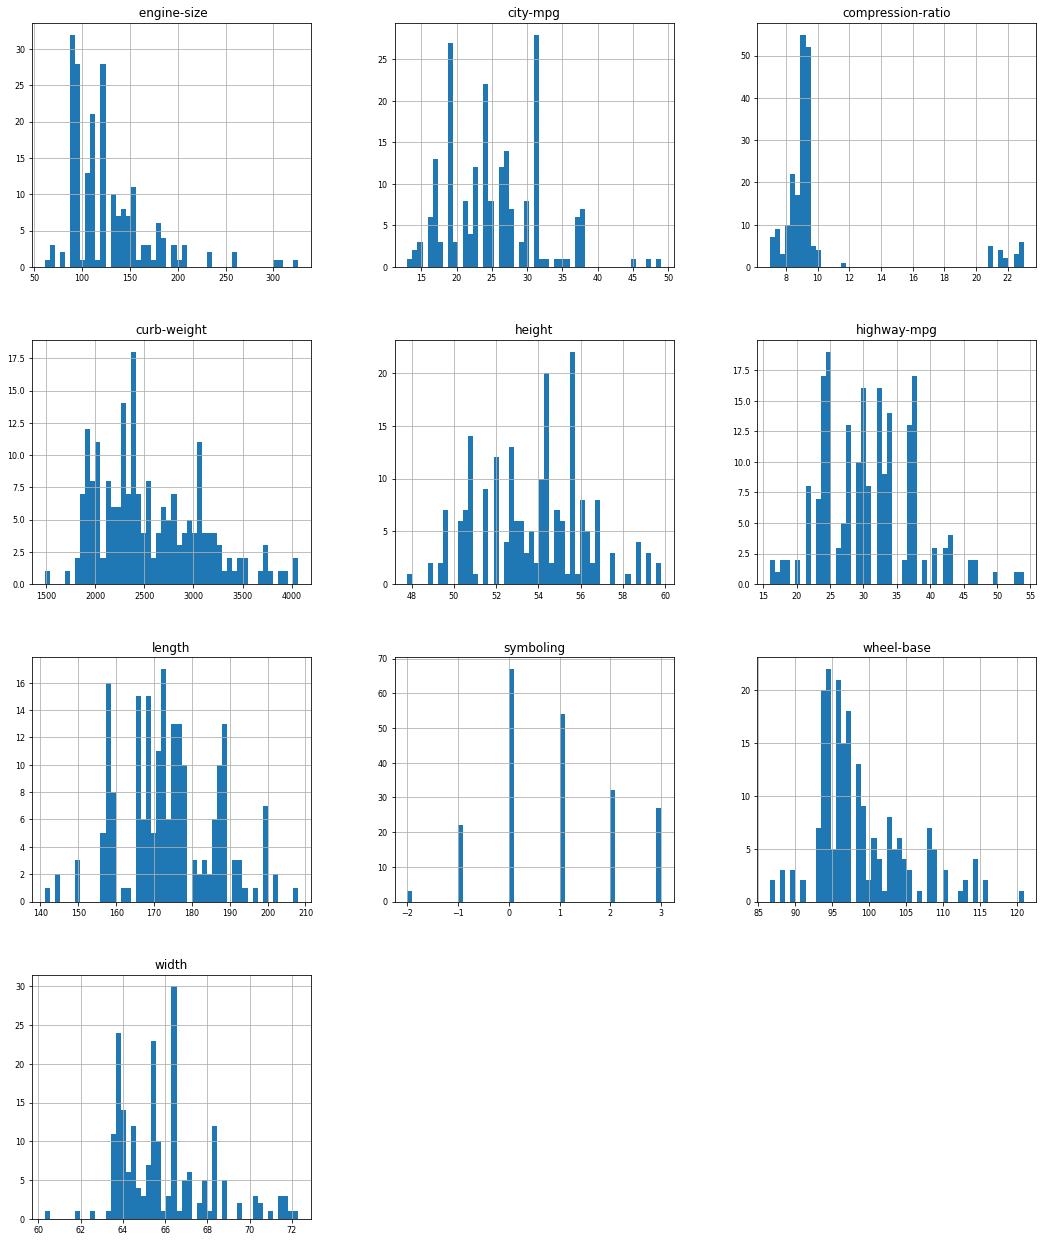

In [ ]:
dataset.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)

In [ ]:
dataset.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
 engine-size         0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [ ]:
dataset.corr()['price'][:-1]

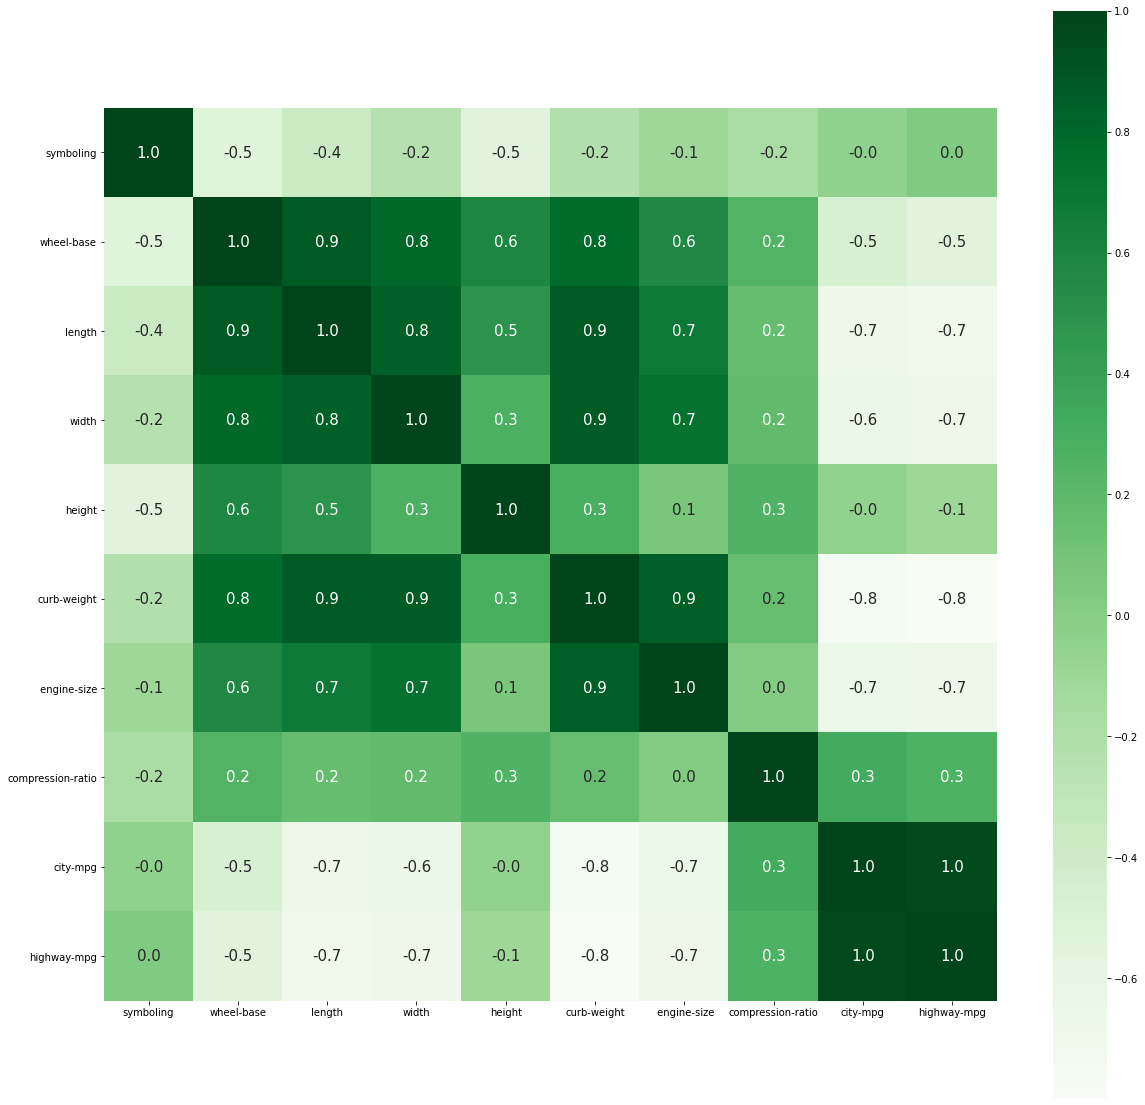

In [ ]:
corr = dataset.corr()
plt.figure(figsize=(20,20))
sb.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [ ]:
feature = dataset.drop(['price'], axis=1)
label = dataset['price']

In [ ]:
scaler = QuantileTransformer()

feature_scaled = scaler.fit_transform(feature.values) 
feature_train, feature_test, label_train, label_test = train_test_split(feature_scaled, label, test_size=0.25, random_state=10)

In [ ]:
def preproces(type_of_transform):
  scaler = type_of_transform

  feature_scaled = scaler.fit_transform(feature.values) 
  feature_train, feature_test, label_train, label_test = train_test_split(feature_scaled, label, test_size=0.25, random_state=10)
  
  lin_reg = LinearRegression()
  lin_reg.fit(feature_train, label_train)

  predictions = lin_reg.predict(feature_test)

  print("\nprediksi menggunakan ", type_of_transform)
  # print('Akurasi dari Testing Set: {:.3f}'.format(lin_reg.score(feature_test, label_test))) # .score() -> Accuracy
  print("r2 score")
  print(r2_score(label_test, predictions))
  print("RMSE")
  print(np.sqrt(mean_squared_error(label_test, predictions)))


In [ ]:
preproces(StandardScaler())


prediksi menggunakan  StandardScaler(copy=True, with_mean=True, with_std=True)
r2 score
0.2894540453148069
RMSE
0.7449048928691178


In [ ]:
preproces(PowerTransformer())


prediksi menggunakan  PowerTransformer(copy=True, method='yeo-johnson', standardize=True)
r2 score
0.29148480551138856
RMSE
0.7438396517011734


In [ ]:
preproces(QuantileTransformer())


prediksi menggunakan  QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=1000,
                    output_distribution='uniform', random_state=None,
                    subsample=100000)
r2 score
0.2958270002311757
RMSE
0.7415568068669044


In [ ]:
preproces(MinMaxScaler())


prediksi menggunakan  MinMaxScaler(copy=True, feature_range=(0, 1))
r2 score
0.289454045314806
RMSE
0.7449048928691182


In [ ]:
preproces(MaxAbsScaler())


prediksi menggunakan  MaxAbsScaler(copy=True)
r2 score
0.289454045314814
RMSE
0.744904892869114


In [ ]:
preproces(RobustScaler())


prediksi menggunakan  RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)
r2 score
0.2894540453148069
RMSE
0.7449048928691178


In [ ]:
preproces(power_transform(feature,method='box-cox'))

Untuk hasil dari beberapa metode transformasi nilai akurasi nya hampir sama semua untuk metode **StandardScaler(), RobustScaler(), MaxAbsScaler(), MinMaxScaler()** yaitu **0.2894**, sedangkan untuk metode **yeo-johnson** nilai akurasi nya sedikit lebih tinggi yaitu **0.2914** dan nilai akurasi yang paling tinggi didapatkan dengan menggunakan metode **QuantileTransformer()** yaitu **0.2958**.
Untuk Metode **Box Cox Transformation** mengalami error karena metode ini hanya bisa digunakan pada data yang positif.

In [ ]:
#Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=400, bootstrap=True, max_features = "sqrt",max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_leaf_nodes=None, random_state=10)
random_forest.fit(feature_train, label_train)

predictions = random_forest.predict(feature_train)

print("prediksi menggunakan training set")
# print('Akurasi dari Testing Set: {:.3f}'.format(lin_reg.score(feature_test, label_test))) # .score() -> Accuracy
print("r2 score")
print(r2_score(label_train, predictions))
print("RMSE")
print(np.sqrt(mean_squared_error(label_train, predictions)))

predictions = random_forest.predict(feature_test)

print("\nprediksi menggunakan testing set")
# print('Akurasi dari Testing Set: {:.3f}'.format(lin_reg.score(feature_test, label_test))) # .score() -> Accuracy
print("r2 score")
print(r2_score(label_test, predictions))
print("RMSE")
print(np.sqrt(mean_squared_error(label_test, predictions)))

prediksi menggunakan training set
r2 score
0.9341273036313185
RMSE
0.22739717356196296

prediksi menggunakan testing set
r2 score
0.5621033607384655
RMSE
0.5847773560274449


In [ ]:
#XGBoost
xgb_model = xgb.XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=400, verbosity=1, objective='reg:squarederror', booster='gbtree',)
xgb_model.fit(feature_train, label_train)

predictions = xgb_model.predict(feature_train)

print("prediksi menggunakan training set")
# print('Akurasi dari Testing Set: {:.3f}'.format(lin_reg.score(feature_test, label_test))) # .score() -> Accuracy
print("r2 score")
print(r2_score(label_train, predictions))
print("RMSE")
print(np.sqrt(mean_squared_error(label_train, predictions)))

predictions = xgb_model.predict(feature_test)

print("\nprediksi menggunakan testing set")
# print('Akurasi dari Testing Set: {:.3f}'.format(lin_reg.score(feature_test, label_test))) # .score() -> Accuracy
print("r2 score")
print(r2_score(label_test, predictions))
print("RMSE")
print(np.sqrt(mean_squared_error(label_test, predictions)))

prediksi menggunakan training set
r2 score
0.6454421876205066
RMSE
0.5275648734782311

prediksi menggunakan testing set
r2 score
0.4328202391529794
RMSE
0.6655261183397152


In [ ]:
#SVM Regressor
svm_reg = SVR(kernel='rbf', C=50.0)
svm_reg.fit(feature_train, label_train)

predictions = svm_reg.predict(feature_train)

print("prediksi menggunakan training set")
# print('Akurasi dari Testing Set: {:.3f}'.format(lin_reg.score(feature_test, label_test))) # .score() -> Accuracy
print("r2 score")
print(r2_score(label_train, predictions))
print("RMSE")
print(np.sqrt(mean_squared_error(label_train, predictions)))

predictions = svm_reg.predict(feature_test)

print("\nprediksi menggunakan testing set")
# print('Akurasi dari Testing Set: {:.3f}'.format(lin_reg.score(feature_test, label_test))) # .score() -> Accuracy
print("r2 score")
print(r2_score(label_test, predictions))
print("RMSE")
print(np.sqrt(mean_squared_error(label_test, predictions)))

prediksi menggunakan training set
r2 score
0.8109368072785145
RMSE
0.3852439575993991

prediksi menggunakan testing set
r2 score
0.2994027596984986
RMSE
0.7396716141933235


In [ ]:
#KNN Regressor
knn = KNeighborsRegressor(n_neighbors=11, leaf_size=30, p=2, n_jobs=None, algorithm='auto')
knn.fit(feature_train, label_train)

predictions = knn.predict(feature_train)

print("prediksi menggunakan training set")
# print('Akurasi dari Testing Set: {:.3f}'.format(lin_reg.score(feature_test, label_test))) # .score() -> Accuracy
print("r2 score")
print(r2_score(label_train, predictions))
print("RMSE")
print(np.sqrt(mean_squared_error(label_train, predictions)))

predictions = knn.predict(feature_test)

print("\nprediksi menggunakan testing set")
# print('Akurasi dari Testing Set: {:.3f}'.format(lin_reg.score(feature_test, label_test))) # .score() -> Accuracy
print("r2 score")
print(r2_score(label_test, predictions))
print("RMSE")
print(np.sqrt(mean_squared_error(label_test, predictions)))

prediksi menggunakan training set
r2 score
0.46118091124038185
RMSE
0.6503600090946873

prediksi menggunakan testing set
r2 score
0.3669173005611487
RMSE
0.7031289249061197


Nilai **r2score** yang paling tinggi didapatkan dengan menggunakan algoritma **Random Forest Regressor** yaitu **0.5621** dan nilai **RMSE 0.5847**.